In [1]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## BACKGROUNDS

#### tt

In [2]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/tt/LO/Auto_Results_LHCO/'

tt_cross = 0.164
tt_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(51,tt_runs+51):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

tt_evs = len(ev)
print('# events that pass the cuts: ', tt_evs)

/home/andres/anaconda3/envs/py2/lib/python2.7/site-packages/LHCO_reader/LHCO_reader.py:359: UserWarning: Couldn't read total number of events from LHCO
  warnings.warn("Couldn't read total number of events from LHCO")


('# events that pass the cuts: ', 39157)


In [3]:
cross = tt_cross*1000
aceptancia = tt_evs/(50000.*tt_runs)
luminosidad = 139

tt_fidcross = cross * aceptancia
tt_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', tt_fidcross)
print('B_expected: ', tt_Bexpected)

('fiducial cross section: ', 5.1373984)
('B_expected: ', 714.0983776)


In [6]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/tt/LO/Auto_Results_LHCO/'

tt_cross = 0.164
tt_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(51,tt_runs+51):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

tt_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', tt_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 354)


In [7]:
cross = tt_cross*1000
aceptancia = tt_evs_ATLAS/(50000.*tt_runs)
luminosidad = 139

tt_fidcross_ATLAS = cross * aceptancia
tt_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_tt = 4.8+2.69+0.64
k_factor_tt = sum_ATLAS_pT_tt / tt_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', tt_fidcross_ATLAS)
print('B_expected: ', tt_Bexpected_ATLAS)
print('k-factor: ', k_factor_tt)

ATLAS CUTS
('fiducial cross section: ', 0.0464448)
('B_expected: ', 6.4558272)
('k-factor: ', 1.2593273872014419)


#### fake tt

In [8]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/fakett/LO/Auto_Results_LHCO/'

fakett_cross = 149.5
fakett_runs = 125

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,126):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

fakett_evs = len(ev)
print('# events that pass the cuts: ', fakett_evs)

('# events that pass the cuts: ', 8)


In [9]:
cross = fakett_cross*1000
aceptancia = fakett_evs/(50000.*fakett_runs)
luminosidad = 139

fakett_fidcross = cross * aceptancia
fakett_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', fakett_fidcross)
print('B_expected: ', fakett_Bexpected)

('fiducial cross section: ', 0.19136)
('B_expected: ', 26.59904)


In [10]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/fakett/LO/Auto_Results_LHCO/'

fakett_cross = 149.5
fakett_runs = 125

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,126):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

fakett_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', fakett_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 1)


In [11]:
cross = fakett_cross*1000
aceptancia = fakett_evs_ATLAS/(50000.*fakett_runs)
luminosidad = 139

fakett_fidcross_ATLAS = cross * aceptancia
fakett_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_fakett = 2.83+0.66+0.185
k_factor_fakett = sum_ATLAS_pT_fakett / fakett_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', fakett_fidcross_ATLAS)
print('B_expected: ', fakett_Bexpected_ATLAS)
print('k-factor: ', k_factor_fakett)

ATLAS CUTS
('fiducial cross section: ', 0.02392)
('B_expected: ', 3.32488)
('k-factor: ', 1.1053030485310749)


#### single t part 1 (part of single t)

In [46]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/singletP1/LO/Auto_Results_LHCO/'

singletP1_cross = 0.0177
singletP1_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(51,singletP1_runs+51):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP1_evs = len(ev)
print('# events that pass the cuts: ', singletP1_evs)

('# events that pass the cuts: ', 28000)


In [47]:
cross = singletP1_cross*1000
aceptancia = singletP1_evs/(50000.*singletP1_runs)
luminosidad = 139

singletP1_fidcross = cross * aceptancia
singletP1_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', singletP1_fidcross)
print('B_expected: ', singletP1_Bexpected)

('fiducial cross section: ', 0.39648)
('B_expected: ', 55.11072)


In [48]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/singletP1/LO/Auto_Results_LHCO/'

singletP1_cross = 0.0177
singletP1_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(51,singletP1_runs+51):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP1_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', singletP1_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 214)


In [62]:
cross = singletP1_cross*1000
aceptancia = singletP1_evs_ATLAS/(50000.*singletP1_runs)
luminosidad = 139

singletP1_fidcross_ATLAS = cross * aceptancia
singletP1_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_singletP1 = 0.85+0.54+0.57
k_factor_singletP1 = sum_ATLAS_pT_singletP1 / singletP1_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', singletP1_fidcross_ATLAS)
print('B_expected: ', singletP1_Bexpected_ATLAS)
print('k-factor: ', k_factor_singletP1)

ATLAS CUTS
('fiducial cross section: ', 0.0030302399999999996)
('B_expected: ', 0.4212033599999999)
('k-factor: ', 4.653334199423291)


#### single t comp (part of single t)

In [50]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/singlet-comp/LO/Auto_Results_LHCO/'

singletP2_cross = 0.015
singletP2_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP2_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP2_evs = len(ev)
print('# events that pass the cuts: ', singletP2_evs)

('# events that pass the cuts: ', 23584)


In [51]:
cross = singletP2_cross*1000
aceptancia = singletP2_evs/(50000.*singletP2_runs)
luminosidad = 139

singletP2_fidcross = cross * aceptancia
singletP2_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', singletP2_fidcross)
print('B_expected: ', singletP2_Sexpected)

('fiducial cross section: ', 0.28300800000000004)
('B_expected: ', 39.338112)


In [52]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/singlet-comp/LO/Auto_Results_LHCO/'

singletP2_cross = 0.015
singletP2_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,singletP2_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

singletP2_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', singletP2_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 89)


In [63]:
cross = singletP2_cross*1000
aceptancia = singletP2_evs_ATLAS/(50000.*singletP2_runs)
luminosidad = 139

singletP2_fidcross_ATLAS = cross * aceptancia
singletP2_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_singletP2 = 0.85+0.54+0.57
k_factor_singletP2 = sum_ATLAS_pT_singletP2 / singletP2_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', singletP2_fidcross_ATLAS)
print('B_expected: ', singletP2_Sexpected_ATLAS)
print('k-factor: ', k_factor_singletP2)

ATLAS CUTS
('fiducial cross section: ', 0.001068)
('B_expected: ', 0.148452)
('k-factor: ', 13.20292080941988)


#### single t (single t part 1 and single t comp)

In [64]:
# single t part 1 + single t comp

sum_ATLAS_pT_singlet = 0.85+0.54+0.57

# singletP1_Sexpected_ATLAS = 0.4212033599999999
# singletP2_Sexpected_ATLAS = 0.148452

k_factor_singlet = sum_ATLAS_pT_singlet / (singletP1_Bexpected_ATLAS+singletP2_Bexpected_ATLAS)

print('ATLAS CUTS')
print('B_expected: ', (singletP1_Bexpected_ATLAS+singletP2_Bexpected_ATLAS))
print('k-factor for both: ', k_factor_singlet)

ATLAS CUTS
('B_expected: ', 0.8424067199999998)
('k-factor for both: ', 3.440676833094312)


In [66]:
# check
print( sum_ATLAS_pT_singlet )
print( ( (0.001068 * k_factor_singlet) + (0.0030302399999999996* k_factor_singlet) ) * 139 )

1.96
1.96


#### W plus b b jets

In [22]:
# due to matching check the number of events
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/'

total_evs_Wbbjets = 0

Wbbjets_runs = 25

for i in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(i)+".lhco")
    total_evs_Wbbjets += len(inputevents) 
    print(inputevents)

print('total_evs: ', total_evs_Wbbjets)

+------------------+-----------------------------------------------------------------------------------------+
| Number of events | 39279                                                                                   |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/run_01.lhco |
+------------------+-----------------------------------------------------------------------------------------+
+------------------+-----------------------------------------------------------------------------------------+
| Number of events | 39452                                                                                   |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/run_02.lhco |
+------------------+-----------------------------------------------------------------------------------------+
+------------------+-----------------------------------------------------------------------------------------+
|

+------------------+------------------------------------------------------------------------------------------+
| Number of events | 39206                                                                                    |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/run_020.lhco |
+------------------+------------------------------------------------------------------------------------------+
+------------------+------------------------------------------------------------------------------------------+
| Number of events | 39225                                                                                    |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/run_021.lhco |
+------------------+------------------------------------------------------------------------------------------+
+------------------+------------------------------------------------------------------------------------

In [23]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/'

Wbbjets_cross = 0.03635
Wbbjets_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Wbbjets_evs = len(ev)
print('# events that pass the cuts: ', Wbbjets_evs)

('# events that pass the cuts: ', 26960)


In [24]:
cross = Wbbjets_cross*1000
aceptancia = Wbbjets_evs/(1.*total_evs_Wbbjets)
luminosidad = 139

Wbbjets_fidcross = cross * aceptancia
Wbbjets_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wbbjets_fidcross)
print('B_expected: ', Wbbjets_Bexpected)

('fiducial cross section: ', 0.9988452079186325)
('B_expected: ', 138.8394839006899)


In [25]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Wbbjets/LO/Auto_Results_LHCO/'

Wbbjets_cross = 0.03635
Wbbjets_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Wbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Wbbjets_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Wbbjets_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 268)


In [26]:
cross = Wbbjets_cross*1000
aceptancia = Wbbjets_evs_ATLAS/(1.*total_evs_Wbbjets)
luminosidad = 139

Wbbjets_fidcross_ATLAS = cross * aceptancia
Wbbjets_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_Wbbjets = 0.34+0.64+0.37
k_factor_Wbbjets = sum_ATLAS_pT_Wbbjets / Wbbjets_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', Wbbjets_fidcross_ATLAS)
print('B_expected: ', Wbbjets_Bexpected_ATLAS)
print('k-factor: ', k_factor_Wbbjets)

ATLAS CUTS
('fiducial cross section: ', 0.009929173431832104)
('B_expected: ', 1.3801551070246625)
('k-factor: ', 0.9781509289273502)


#### Z plus b b jets

In [27]:
# due to matching check the number of events
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/'

total_evs_Zbbjets = 0

Zbbjets_runs = 25

for i in range(1,Zbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(i)+".lhco")
    total_evs_Zbbjets += len(inputevents) 
    print(inputevents)

print('total_evs: ', total_evs_Zbbjets)

+------------------+-----------------------------------------------------------------------------------------+
| Number of events | 29906                                                                                   |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/run_01.lhco |
+------------------+-----------------------------------------------------------------------------------------+
+------------------+-----------------------------------------------------------------------------------------+
| Number of events | 29599                                                                                   |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/run_02.lhco |
+------------------+-----------------------------------------------------------------------------------------+
+------------------+-----------------------------------------------------------------------------------------+
|

+------------------+------------------------------------------------------------------------------------------+
| Number of events | 29792                                                                                    |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/run_020.lhco |
+------------------+------------------------------------------------------------------------------------------+
+------------------+------------------------------------------------------------------------------------------+
| Number of events | 29788                                                                                    |
| Description      | /media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/run_021.lhco |
+------------------+------------------------------------------------------------------------------------------+
+------------------+------------------------------------------------------------------------------------

In [28]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/'

Zbbjets_cross = 0.128
Zbbjets_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Zbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Zbbjets_evs = len(ev)
print('# events that pass the cuts: ', Zbbjets_evs)

('# events that pass the cuts: ', 3028)


In [29]:
cross = Zbbjets_cross*1000
aceptancia = Zbbjets_evs/(1.*total_evs_Zbbjets)
luminosidad = 139

Zbbjets_fidcross = cross * aceptancia
Zbbjets_Bexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Zbbjets_fidcross)
print('B_expected: ', Zbbjets_Bexpected)

('fiducial cross section: ', 0.5210225691667193)
('B_expected: ', 72.42213711417398)


In [30]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/Zbbjets/LO/Auto_Results_LHCO/'

Zbbjets_cross = 0.128
Zbbjets_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Zbbjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Zbbjets_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Zbbjets_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 341)


In [31]:
cross = Zbbjets_cross*1000
aceptancia = Zbbjets_evs_ATLAS/(1.*total_evs_Zbbjets)
luminosidad = 139

Zbbjets_fidcross_ATLAS = cross * aceptancia
Zbbjets_Bexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_Zbbjets = 0.275+0.043+0.123
k_factor_Zbbjets = sum_ATLAS_pT_Zbbjets / Zbbjets_Bexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', Zbbjets_fidcross_ATLAS)
print('B_expected: ', Zbbjets_Bexpected_ATLAS)
print('k-factor: ', k_factor_Zbbjets)

ATLAS CUTS
('fiducial cross section: ', 0.05867526290814111)
('B_expected: ', 8.155861544231614)
('k-factor: ', 0.05407154076958375)


#### ttW (part of ttV)

In [32]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttW/LO/Auto_Results_LHCO/'

Bkg_ttW_cross = 0.0004167
Bkg_ttW_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttW_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttW_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttW_evs)

('# events that pass the cuts: ', 69530)


In [33]:
cross = Bkg_ttW_cross*1000
aceptancia = Bkg_ttW_evs/(50000.*Bkg_ttW_runs)
luminosidad = 139

Bkg_ttW_fidcross = cross * aceptancia
Bkg_ttW_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttW_fidcross)
print('B_expected: ', Bkg_ttW_Sexpected)

('fiducial cross section: ', 0.0231785208)
('B_expected: ', 3.2218143912)


In [34]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttW/LO/Auto_Results_LHCO/'

Bkg_ttW_cross = 0.0004167
Bkg_ttW_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttW_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttW_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttW_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 1735)


In [35]:
cross = Bkg_ttW_cross*1000
aceptancia = Bkg_ttW_evs_ATLAS/(50000.*Bkg_ttW_runs)
luminosidad = 139

Bkg_ttW_fidcross_ATLAS = cross * aceptancia
Bkg_ttW_Sexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_ttW = 0.65+0.31+0.092
k_factor_ttW = sum_ATLAS_pT_ttW / Bkg_ttW_Sexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttW_fidcross_ATLAS)
print('B_expected: ', Bkg_ttW_Sexpected_ATLAS)
print('k-factor: ', k_factor_ttW)

ATLAS CUTS
('fiducial cross section: ', 0.0005783796)
('B_expected: ', 0.0803947644)
('k-factor: ', 13.085429229767108)


#### ttZ (part of ttV)

In [36]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttZ/LO/Auto_Results_LHCO/'

Bkg_ttZ_cross = 0.00387
Bkg_ttZ_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttZ_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttZ_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttZ_evs)

('# events that pass the cuts: ', 16178)


In [37]:
cross = Bkg_ttZ_cross*1000
aceptancia = Bkg_ttZ_evs/(50000.*Bkg_ttZ_runs)
luminosidad = 139

Bkg_ttZ_fidcross = cross * aceptancia
Bkg_ttZ_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttZ_fidcross)
print('B_expected: ', Bkg_ttZ_Sexpected)

('fiducial cross section: ', 0.050087088)
('B_expected: ', 6.962105232)


In [38]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttZ/LO/Auto_Results_LHCO/'

Bkg_ttZ_cross = 0.00387
Bkg_ttZ_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttZ_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttZ_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttZ_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 613)


In [39]:
cross = Bkg_ttZ_cross*1000
aceptancia = Bkg_ttZ_evs_ATLAS/(50000.*Bkg_ttZ_runs)
luminosidad = 139

Bkg_ttZ_fidcross_ATLAS = cross * aceptancia
Bkg_ttZ_Sexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_ttZ = 0.65+0.31+0.092
k_factor_ttZ = sum_ATLAS_pT_ttZ / Bkg_ttZ_Sexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttZ_fidcross_ATLAS)
print('B_expected: ', Bkg_ttZ_Sexpected_ATLAS)
print('k-factor: ', k_factor_ttZ)

ATLAS CUTS
('fiducial cross section: ', 0.001897848)
('B_expected: ', 0.26380087199999996)
('k-factor: ', 3.9878564161834924)


#### ttV (ttW and ttZ)

In [40]:
# ttV = ttW + ttZ

sum_ATLAS_pT_ttV = 0.65+0.31+0.092

# Bkg_ttW_Sexpected_ATLAS = 0.0803947644
# Bkg_ttZ_Sexpected_ATLAS = 0.26380087199999996

k_factor_ttV = sum_ATLAS_pT_ttV / (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS)

print('ATLAS CUTS')
print('B_expected: ', (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS))
print('k-factor for both: ', k_factor_ttV)

ATLAS CUTS
('B_expected: ', 0.34419563639999995)
('k-factor for both: ', 3.056401327463198)


In [41]:
# check
print( sum_ATLAS_pT_ttV )
print( ((0.001897848*k_factor_ttV) + (0.0005783796*k_factor_ttV)) * 139 )

1.052
1.052


#### ttH

In [42]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttH/LO/Auto_Results_LHCO/'

Bkg_ttH_cross = 0.00259
Bkg_ttH_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttH_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttH_evs = len(ev)
print('# events that pass the cuts: ', Bkg_ttH_evs)

('# events that pass the cuts: ', 12068)


In [43]:
cross = Bkg_ttH_cross*1000
aceptancia = Bkg_ttH_evs/(50000.*Bkg_ttH_runs)
luminosidad = 139

Bkg_ttH_fidcross = cross * aceptancia
Bkg_ttH_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Bkg_ttH_fidcross)
print('B_expected: ', Bkg_ttH_Sexpected)

('fiducial cross section: ', 0.025004896)
('B_expected: ', 3.475680544)


In [44]:
Folder = '/media/andres/Elements/Leptoquarks/backgrounds/ttH/LO/Auto_Results_LHCO/'

Bkg_ttH_cross = 0.00259
Bkg_ttH_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,Bkg_ttH_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

Bkg_ttH_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', Bkg_ttH_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 295)


In [45]:
cross = Bkg_ttH_cross*1000
aceptancia = Bkg_ttH_evs_ATLAS/(50000.*Bkg_ttH_runs)
luminosidad = 139

Bkg_ttH_fidcross_ATLAS = cross * aceptancia
Bkg_ttH_Sexpected_ATLAS = cross * aceptancia * luminosidad

sum_ATLAS_pT_ttH = 0.1+0.06+0.028
k_factor_ttH = sum_ATLAS_pT_ttH / Bkg_ttH_Sexpected_ATLAS

print('ATLAS CUTS')
print('fiducial cross section: ', Bkg_ttH_fidcross_ATLAS)
print('B_expected: ', Bkg_ttH_Sexpected_ATLAS)
print('k-factor: ', k_factor_ttH)

ATLAS CUTS
('fiducial cross section: ', 0.00061124)
('B_expected: ', 0.08496236)
('k-factor: ', 2.2127445612386474)


### Expected number of events after cuts and k-factors

In [67]:
B_exp_loose = [6.88441702, 6.3706222016, tt_Bexpected, (singletP1_Bexpected+singletP1_Bexpected), Wbbjets_Bexpected, (Bkg_ttZ_Sexpected + Bkg_ttW_Sexpected), fakett_Bexpected, Bkg_ttH_Sexpected]
B_exp_ATLAS = [4.4497505104, 4.60343046719, tt_Bexpected_ATLAS, (singletP1_Bexpected_ATLAS+singletP1_Bexpected_ATLAS), Wbbjets_Bexpected_ATLAS, (Bkg_ttZ_Sexpected_ATLAS + Bkg_ttW_Sexpected_ATLAS), fakett_Bexpected_ATLAS, Bkg_ttH_Sexpected_ATLAS]

k_factor = [1.8877462860822058, 1.8247261601649074, k_factor_tt, k_factor_singlet, k_factor_Wbbjets, k_factor_ttV, k_factor_fakett, k_factor_ttH]

print(B_exp_loose)
print(B_exp_ATLAS)
print(k_factor)

[7.0806601, 6.5686358, 714.0983776, 26.59904, 110.22144, 138.8394839006899, 10.1839196232, 3.475680544]
[4.6235159, 4.789087, 6.4558272, 3.32488, 0.8424067199999998, 1.3801551070246625, 0.34419563639999995, 0.08496236]
[1.8167991761228928, 1.7539875661986353, 1.2593273872014419, 1.1053030485310749, 3.440676833094312, 0.9781509289273502, 3.056401327463198, 2.2127445612386474]


In [2]:
B_exp_loose = [6.88441702, 6.3706222016, 714.0983776, 110.22144, 138.8394839006899, 10.1839196232, 26.59904, 3.475680544]
B_exp_ATLAS = [4.4497505104, 4.60343046719, 6.4558272, 0.8424067199999998, 1.3801551070246625, 0.34419563639999995, 3.32488, 0.08496236]

k_factor = [1.8877462860822058, 1.8247261601649074, 1.2593273872014419, 3.440676833094312, 0.9781509289273502, 3.056401327463198, 1.1053030485310749, 2.2127445612386474]

In [5]:
process = ['$LQ^u_3$','$LQ^d_3$',r'$t\bar{t}$','single $t$','$W$+j',r'$t\bar{t}V$',r'fake $t\bar{t}$', r'$t\bar{t}H$']

B_exp_loose_k = [i*j for i, j in zip(B_exp_loose,k_factor)]
B_exp_ATLAS_k = [i*j for i, j in zip(B_exp_ATLAS,k_factor)]

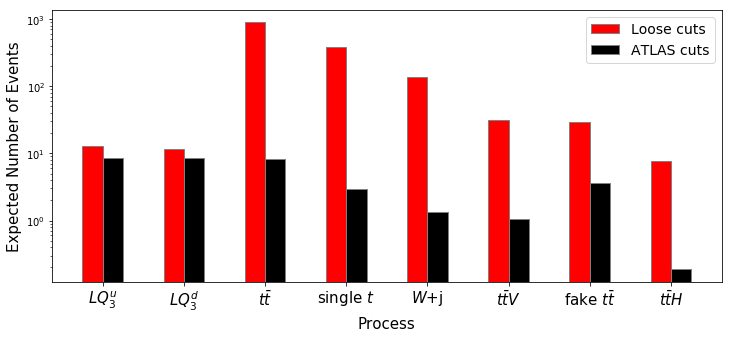

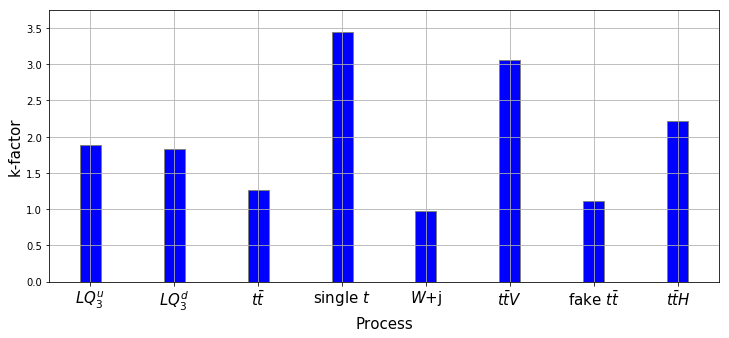

In [6]:
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
br1 = np.arange(len(B_exp_loose))
br2 = [x + barWidth for x in br1]


fig = plt.subplots(figsize =(12, 5))

# Make the plot
plt.bar(br1, B_exp_loose_k, color ='r', width = barWidth, edgecolor ='grey', label ='Loose cuts')
plt.bar(br2, B_exp_ATLAS_k, color ='black', width = barWidth, edgecolor ='grey', label ='ATLAS cuts')
 
# Adding Xticks
plt.yscale('log')
#plt.ylim([0,150])
plt.ylabel('Expected Number of Events', fontsize = 15)
plt.xlabel('Process', fontsize = 15)
plt.xticks([r+barWidth/2 for r in range(len(process))], process, fontsize = 15)
#plt.grid()
plt.legend(fontsize=14)
plt.savefig('process_num_events.pdf', bbox_inches='tight')
plt.show()




# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 5))
 
# Set position of bar on X axis
br1 = np.arange(len(k_factor))
 
# Make the plot
plt.bar(br1, k_factor, color ='b', width = barWidth, edgecolor ='grey', label ='k-factors ATLAS cuts')
 
# Adding Xticks
#plt.yscale('log')
plt.ylim([0,3.75])
plt.ylabel('k-factor', fontsize = 15)
plt.xlabel('Process', fontsize = 15)
plt.xticks([r for r in range(len(process))], process, fontsize = 15)
plt.grid()
#plt.legend(fontsize=14)
plt.savefig('process_kfactors.pdf', bbox_inches='tight')
plt.show()